In [8]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

from prepare import train_validate_test_split
import prepare

In [2]:
df = prepare.get_animal_data()

In [3]:
df.head()

,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
Animal ID,,,,,,,,,,,
A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [4]:
df = prepare.prep_animal_data(df)

In [5]:
df.head()

,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age,Breed,Color,...,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female,sex_Unknown
Animal ID,,,,,,,,,,,,,,,,,,,,,
A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,2017-05-02,Rto-Adopt,Cat,Neutered Male,5,Domestic Shorthair Mix,Brown Tabby/White,...,0,1,0,0,0,0,0,1,0,0
A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,2017-07-12,Adoption,Dog,Neutered Male,5,Chihuahua Shorthair Mix,White/Brown,...,0,0,1,0,0,0,0,1,0,0
A821648,No_name,08/16/2020 11:38:00 AM,Aug 2020,2019-08-16,Euthanasia,Other,Unknown,3,Raccoon,Gray,...,0,0,0,0,1,0,0,0,0,1
A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,2015-10-08,Adoption,Dog,Neutered Male,7,Anatol Shepherd/Labrador Retriever,Buff,...,0,0,1,0,0,0,0,1,0,0
A674754,No_name,03/18/2014 11:47:00 AM,Mar 2014,2014-03-12,Transfer,Cat,Intact Male,8,Domestic Shorthair Mix,Orange Tabby,...,0,1,0,0,0,0,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142750 entries, A794011 to A857750
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Name                   142750 non-null  object        
 1   DateTime               142750 non-null  object        
 2   MonthYear              142750 non-null  object        
 3   DOB                    142750 non-null  datetime64[ns]
 4   outcome                142750 non-null  object        
 5   animal_type            142750 non-null  object        
 6   sex                    142750 non-null  object        
 7   age                    142750 non-null  int64         
 8   Breed                  142750 non-null  object        
 9   Color                  142750 non-null  object        
 10  year                   142750 non-null  int64         
 11  age_bin                140392 non-null  category      
 12  Adoption               142750 non-null  ui

In [ ]:
prepare.prep_animal_data(df)

In [9]:
train, validate, test = train_validate_test_split(df, target='Euthanasia')
train.shape, validate.shape, test.shape

((79940, 33), (34260, 33), (28550, 33))

Initial questions 

- what sex of animals is more likely to get euthi

- what animal type is more lkely to get euthi

- Does the age of the animal determine the euthinization

- what age are animals more likly to get adopted?

- what Breed is more likly to get adopted 

## Question 1 what animal type of animals is more likely to get euthi

<Figure size 1080x720 with 0 Axes>

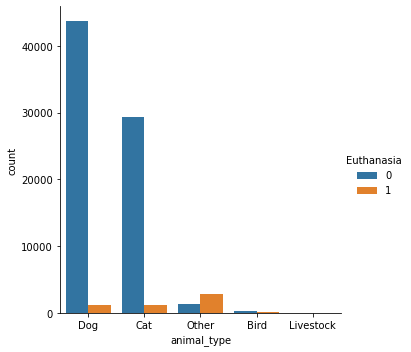

In [12]:
plt.figure(figsize=(15,10))
sns.catplot(x="animal_type",hue = 'Euthanasia', data=train, kind='count')

## Question 1.2 what animal type of animals is more likely to get adopted

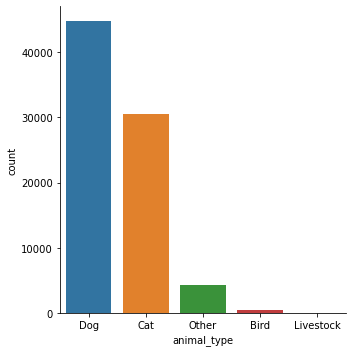

In [14]:
sns.catplot(x="animal_type", data=train, kind='count')

In [15]:
df.animal_type.value_counts()

Dog          80072
Cat          54430
Other         7542
Bird           680
Livestock       26
Name: animal_type, dtype: int64

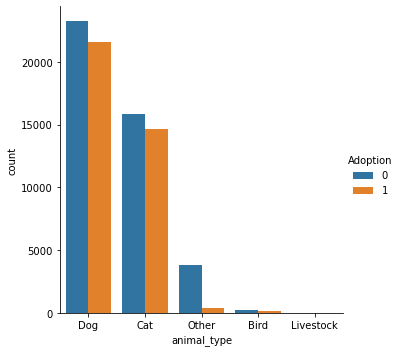

In [13]:
sns.catplot(x="animal_type",hue = 'Adoption', data=train, kind='count')